In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans, Birch
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
# import cv2 as cv
from PIL import Image

In [52]:
def get_image(image_path):
  image = Image.open(image_path)

  return np.array(image)

image = get_image("./481903.png")
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [22]:
# def get_image(image_path):
#   image = cv.imread(image_path)

#   # converting from BGR colorspace to RGB colorspace
#   image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
#   return image

In [53]:
def RGBHEX(color):
  return (f"#{int(color[0]):02x}{int(color[1]):02x}{int(color[2]):02x}")

In [63]:
image = get_image("./736461.png")
image.shape

(1200, 1920, 3)

In [55]:
image_array = np.array(image)
image_array

array([[[ 48,   2,  19, 255],
        [ 66,   2,  29, 255],
        [ 87,   3,  44, 255],
        ...,
        [150, 142,  87, 255],
        [153, 142,  93, 255],
        [146, 132,  96, 255]],

       [[ 47,   0,  24, 255],
        [ 74,   0,  34, 255],
        [ 92,   0,  46, 255],
        ...,
        [142, 133,  85, 255],
        [137, 126,  80, 255],
        [136, 127,  87, 255]],

       [[ 33,   0,  19, 255],
        [ 69,   0,  36, 255],
        [ 96,   5,  48, 255],
        ...,
        [141, 137,  86, 255],
        [141, 135,  85, 255],
        [143, 143,  93, 255]],

       ...,

       [[  2,   0,  13, 255],
        [  4,   0,  16, 255],
        [  3,   0,  19, 255],
        ...,
        [  3,   0,  15, 255],
        [  3,   0,  14, 255],
        [  4,   0,  12, 255]],

       [[  4,   0,  16, 255],
        [  4,   0,  16, 255],
        [  4,   0,  21, 255],
        ...,
        [  4,   0,  15, 255],
        [  0,   0,  15, 255],
        [  3,   0,  13, 255]],

       [[  0

In [58]:
number_of_colors = 5
mod_image = image_array.reshape(image_array.shape[0] * image_array.shape[1], 4)
mod_image.shape

(3538944, 4)

In [59]:
mod_image

array([[ 48,   2,  19, 255],
       [ 66,   2,  29, 255],
       [ 87,   3,  44, 255],
       ...,
       [  4,   0,  15, 255],
       [  0,   0,  14, 255],
       [ 12,   0,  13, 255]], dtype=uint8)

In [60]:
clf = KMeans(n_clusters=number_of_colors)
labels = clf.fit_predict(mod_image)

In [61]:
labels

array([0, 0, 4, ..., 0, 0, 0], dtype=int32)

In [62]:
counts = Counter(labels)

In [45]:
counts

Counter({0: 3237571, 4: 219584, 3: 57245, 1: 264770, 2: 417182})

In [46]:
center_colors = clf.cluster_centers_
center_colors

array([[254.94344587, 254.92737889, 254.91933211],
       [220.82398752,  18.18937875,  27.55481152],
       [236.17668505, 243.70719564,  34.41505047],
       [ 12.754922  ,  10.52420383,   8.55185787],
       [212.09816744, 201.42370573,  36.27780257]])

In [47]:
ordered_colors = [center_colors[i] for i in counts.keys()]
ordered_colors

[array([254.94344587, 254.92737889, 254.91933211]),
 array([212.09816744, 201.42370573,  36.27780257]),
 array([12.754922  , 10.52420383,  8.55185787]),
 array([220.82398752,  18.18937875,  27.55481152]),
 array([236.17668505, 243.70719564,  34.41505047])]

In [48]:
hex_colors = [RGBHEX(ordered_colors[i]) for i in counts.keys()]

In [49]:
hex_colors

['#fefefe', '#ecf322', '#dc121b', '#d4c924', '#0c0a08']

([<matplotlib.patches.Wedge at 0x7f976fdf5c90>,
 [Text(-0.8285873121917066, 0.7234936530992677, '#fefefe'),
  Text(0.32465998899580084, -1.0509975697142437, '#ecf322'),
  Text(0.5339734020276214, -0.9617028677959988, '#dc121b'),
  Text(0.7481361071040387, -0.8064070716748549, '#d4c924'),
  Text(1.0467847298911377, -0.33799664091043624, '#0c0a08')])

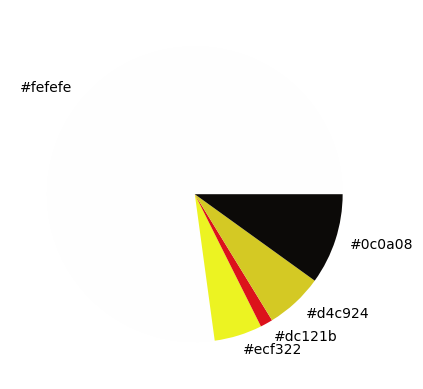

In [50]:
plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)